In [1]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/marketing_campaigns_clean.csv')

**¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?**


Objetivo: Analiza la distribución de canales y compara su rendimiento en términos de ROI y otros indicadores clave.

Enfoque sugerido: Combina análisis de frecuencia con métricas de rendimiento para identificar no solo los canales más utilizados sino también los más efectivos. Considera segmentar por tipo de campaña o audiencia para un análisis más detallado.

Visualizaciones recomendadas: Gráfico de barras para frecuencia y diagrama de caja para distribución de ROI por canal**

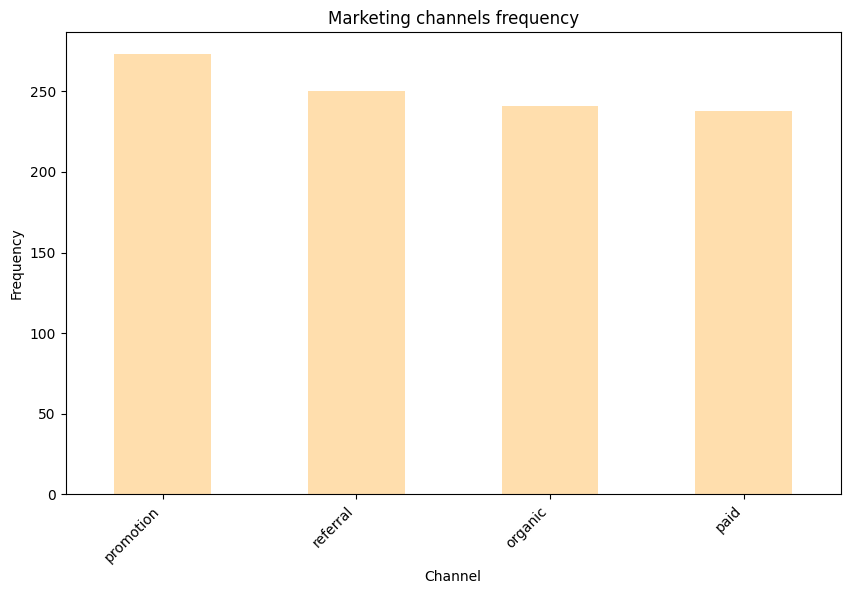

More frequent channels:
channel
promotion    273
referral     250
organic      241
paid         238
Name: count, dtype: int64


C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2643853156.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')


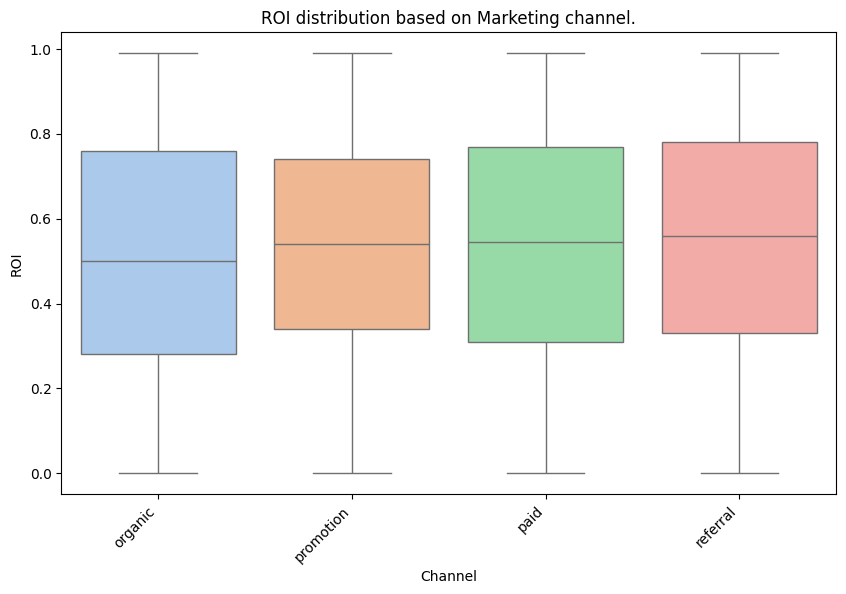

Best ROI per channel:


channel
referral     0.551560
paid         0.540210
promotion    0.535714
organic      0.517801
Name: roi, dtype: float64

In [11]:
# Let's calculate the most frequent channel
channel_frequency = df['channel'].value_counts()

# Now the roi per kind of channel
roi_by_channel = df.groupby('channel')['roi'].mean().sort_values(ascending=False)

# We will use a barplot for checking the frequency
plt.figure(figsize = (10,6))
channel_frequency.plot(kind ='bar', color = 'navajowhite')
plt.title('Marketing channels frequency')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("More frequent channels:")
print(channel_frequency)


# And we will use a boxplot for analyzing the roi distribution based on the channel
plt.figure(figsize = (10,6))
sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')
plt.title('ROI distribution based on Marketing channel.')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("Best ROI per channel:")
roi_by_channel

We can see the most used channel is promotion and the channel that has the best ROI is the referral one.

Podemos ver que el canal más usado es el de "promotion" y el que ofrece mejor ROI es el de "referral".

**¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?**

Objetivo: Compara los diferentes tipos de campaña para identificar cuáles generan más ingresos y tienen mejor tasa de conversión.

Enfoque sugerido: Analiza el rendimiento financiero (ingresos, beneficio neto) y las métricas de efectividad (tasa de conversión, ROI) por tipo de campaña. Busca si existen relaciones entre estas métricas que puedan explicar el éxito de ciertos tipos.

Visualizaciones recomendadas: Gráfico de barras para ingresos promedio y tasa de conversión por tipo, diagrama de dispersión para correlación entre estas métricas

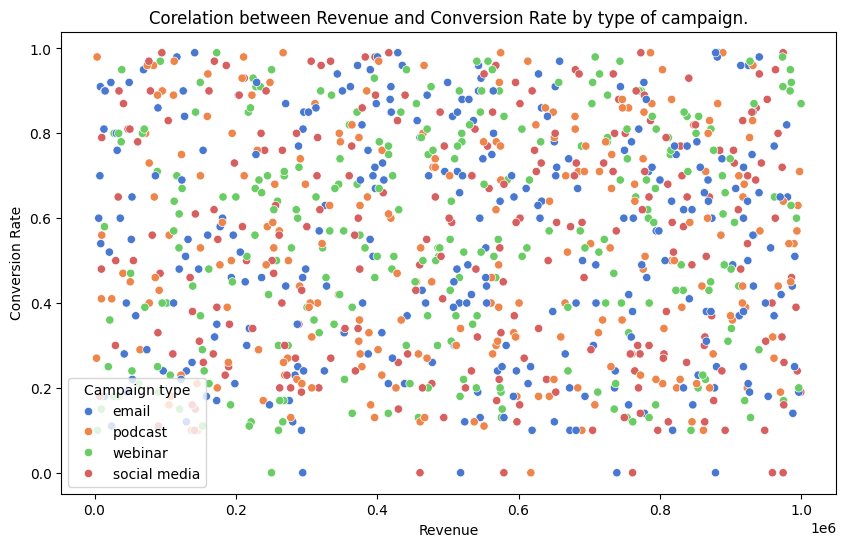

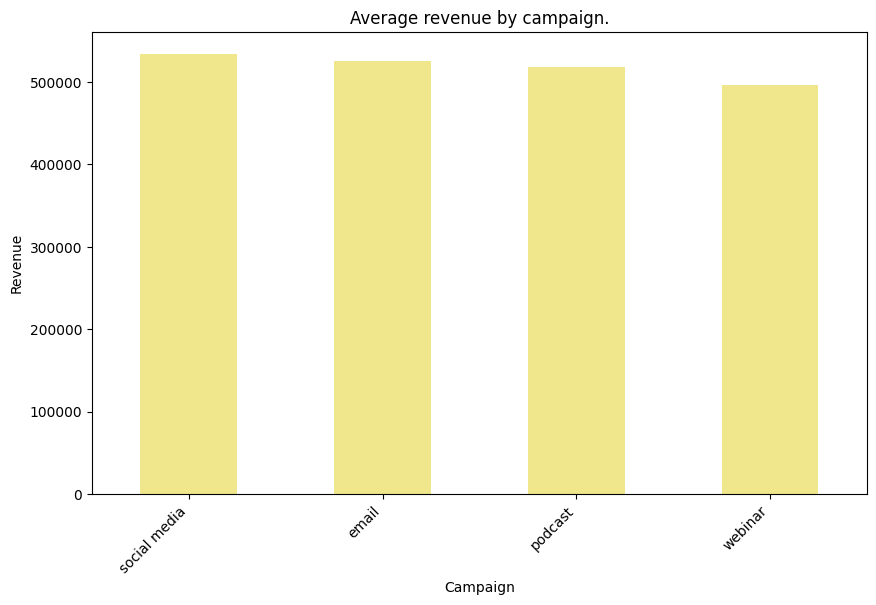

Average revenue by campaign:
type
social media    533772.770129
email           524763.544107
podcast         517894.740395
webinar         495771.704618
Name: revenue, dtype: float64


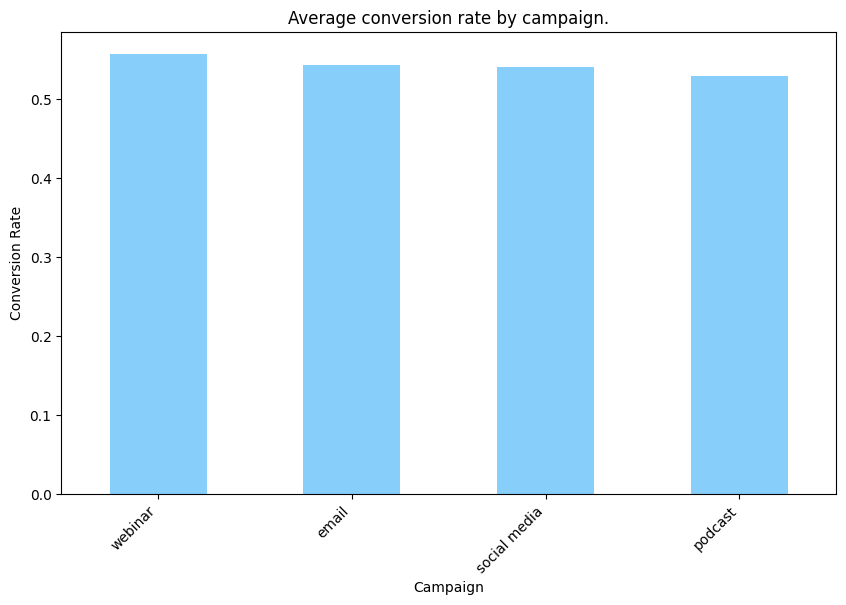

Average conversion rate by campaign:
type
webinar         0.557328
email           0.543750
social media    0.540474
podcast         0.529035
Name: conversion_rate, dtype: float64


In [15]:
# We will calculate the revenue per campaign
revenue_by_type = df.groupby('type')['revenue'].mean().sort_values(ascending = False)

# Now the best conversion rate per campaign
conversion_by_type = df.groupby('type')['conversion_rate'].mean().sort_values(ascending = False)

# We will create a scatter graph to see the correlation between revenue and conversion rate
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'revenue', y = 'conversion_rate', data = df, hue = 'type', palette = 'muted')
plt.title('Corelation between Revenue and Conversion Rate by type of campaign.')
plt.xlabel('Revenue')
plt.ylabel('Conversion Rate')
plt.legend(title = 'Campaign type')
plt.show()

# Now a bar graph to see the revenue by campaign
plt.figure(figsize=(10,6))
revenue_by_type.plot(kind='bar', color='khaki')
plt.title('Average revenue by campaign.')
plt.xlabel('Campaign')
plt.ylabel('Revenue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print('Average revenue by campaign:')
print(revenue_by_type)

# Now the conversion rate by campaign
plt.figure(figsize=(10,6))
conversion_by_type.plot(kind='bar', color = 'lightskyblue')
plt.title('Average conversion rate by campaign.')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print('Average conversion rate by campaign:')
print(conversion_by_type)


Social Media is the campaign type which is providing more revenue and webinar is the one who is having more conversion rate.

El tipo de campaña "social media" es la que genera más ingresos promedio y las campañas "webinar" son las que mejor tasa de conversión tienen.

**¿Cómo se distribuye el ROI entre las campañas? ¿Qué factores están asociados con un ROI alto?**

Objetivo: Analiza la distribución del ROI y busca patrones o factores que estén asociados con mejores resultados.

Enfoque sugerido: Estudia la distribución estadística del ROI, identifica segmentos de alto rendimiento y analiza qué características comparten. Busca correlaciones con otras variables como presupuesto, canal, tipo o audiencia.

Visualizaciones recomendadas: Histograma y boxplot del ROI, heatmap de correlaciones, gráficos de dispersión con ROI como variable objetivo

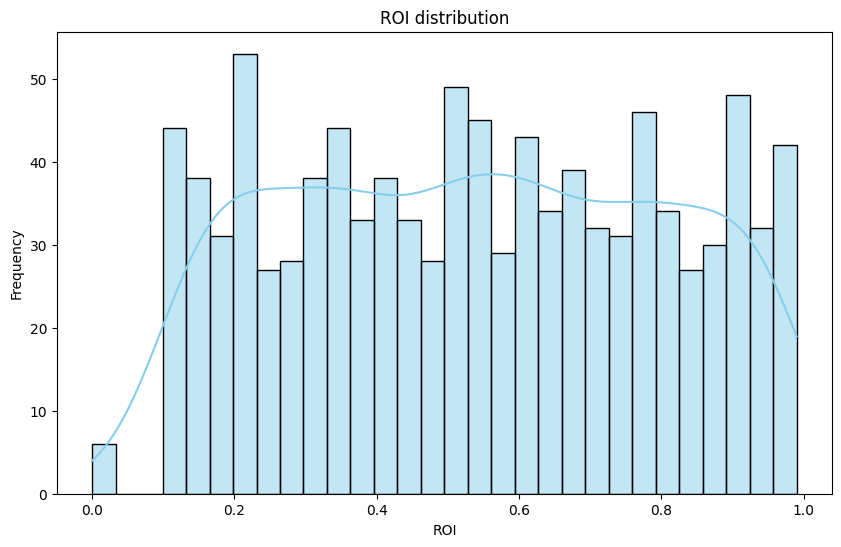

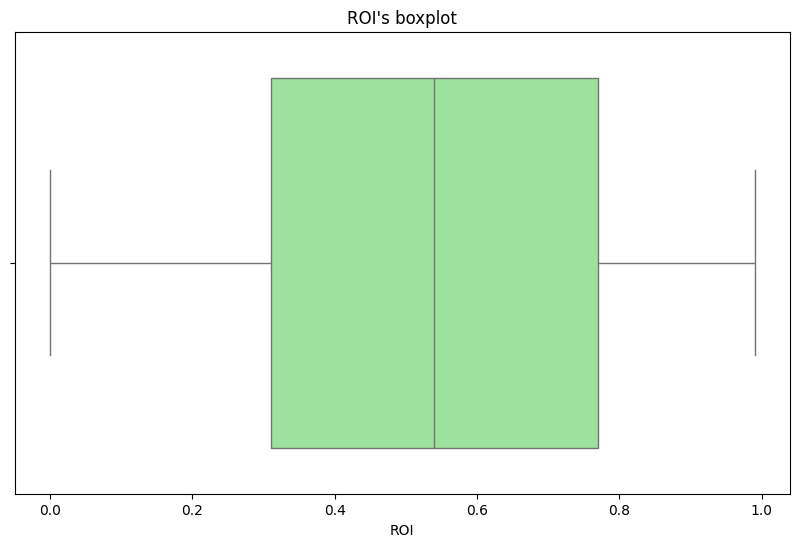

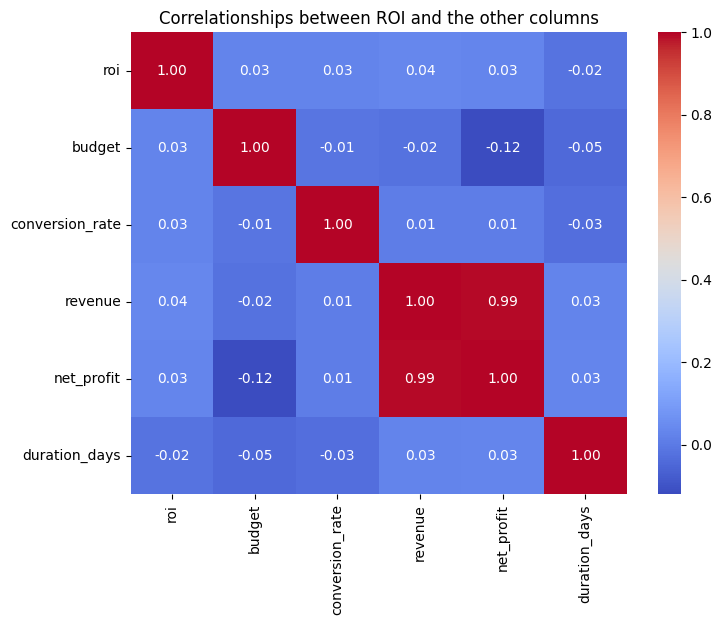

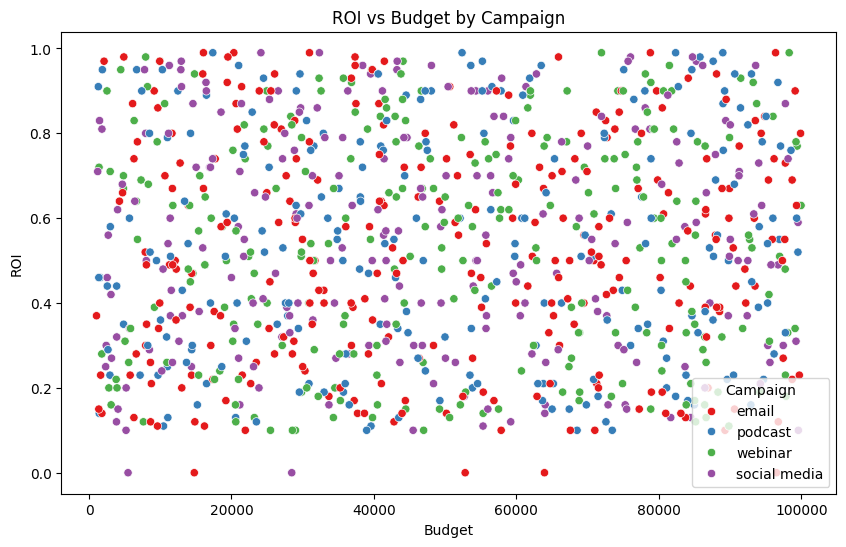

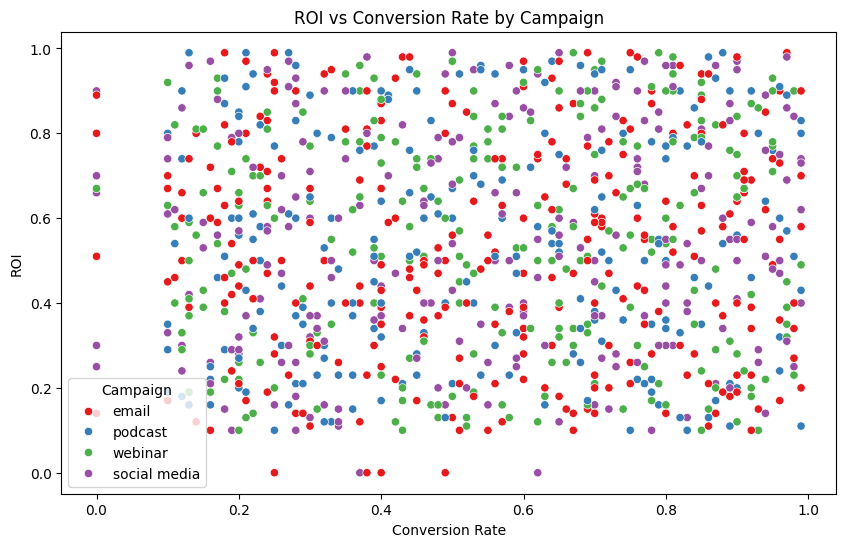

Campaign with a high ROI:


,campaign_name,roi,budget,conversion_rate,type,target_audience,channel,revenue
8,Intuitive responsive support,0.81,1816.22,0.85,social media,B2C,referral,563280.30
12,Optional actuating standardization,0.94,14810.62,0.45,webinar,B2B,referral,477528.27
13,Innovative web-enabled function,0.92,36848.30,0.10,webinar,B2C,referral,4190.95
21,Cross-platform 24/7 archive,0.90,79680.62,0.96,email,B2B,promotion,435524.36
25,Polarized hybrid system engine,0.98,37344.70,0.43,email,B2C,organic,463541.48
...,...,...,...,...,...,...,...,...
992,Switchable solution-oriented success,0.96,93586.76,0.87,social media,B2C,organic,601987.53
993,Multi-channeled 5thgeneration methodology,0.90,7401.50,0.12,podcast,B2B,organic,537274.20
995,Operative tangible firmware,0.80,77555.40,0.21,email,B2C,organic,613448.30
996,Up-sized user-facing secured line,0.80,11168.71,0.20,social media,B2C,promotion,277549.41


In [19]:
# Create a histogram and a boxplot of the ROI's distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['roi'], kde=True, color='skyblue', bins=30)
plt.title('ROI distribution')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['roi'], color='lightgreen')
plt.title("ROI's boxplot")
plt.xlabel('ROI')
plt.show()

# Heatmap to see the correlationship
correlation_matrix = df[['roi', 'budget', 'conversion_rate', 'revenue', 'net_profit', 'duration_days']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlationships between ROI and the other columns')
plt.show()

# Let's see which are the campaigns wiwth the higest ROI
high_roi_campaigns = df[df['roi'] > df['roi'].quantile(0.75)]

# Let's grab only the most important columns
high_roi_features = high_roi_campaigns[['campaign_name', 'roi', 'budget', 'conversion_rate', 'type', 'target_audience', 'channel', 'revenue']]

# We will analyze the ROI against the budget and the conversion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='roi', data=df, hue='type', palette='Set1')
plt.title('ROI vs Budget by Campaign')
plt.xlabel('Budget')
plt.ylabel('ROI')
plt.legend(title='Campaign')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='conversion_rate', y='roi', data=df, hue='type', palette='Set1')
plt.title('ROI vs Conversion Rate by Campaign')
plt.xlabel('Conversion Rate')
plt.ylabel('ROI')
plt.legend(title='Campaign')
plt.show()

print("Campaign with a high ROI:")
high_roi_features


In [25]:
# We will also calculate the ROI mean by campaign
roi_by_type = df.groupby('type')['roi'].mean().reset_index()
roi_by_target = df.groupby('target_audience')['roi'].mean().reset_index()
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()

print(roi_by_type)
print('\n')
print(roi_by_target)
print('\n')
print(roi_by_channel)

           type       roi
0         email  0.524893
1       podcast  0.534561
2  social media  0.552198
3       webinar  0.536412


  target_audience       roi
0             B2B  0.543204
1             B2C  0.529835


     channel       roi
0    organic  0.517801
1       paid  0.540210
2  promotion  0.535714
3   referral  0.551560


Apparently, there is no strong correlation between ROI and any of the other columns. The ROI is fairly evenly distributed across all campaigns, and it is difficult to identify any specific factors that contribute to a high ROI.

Parece que no hay una fuerte correlación entre el "roi" y ninguna de las otras columnas. El "roi" está distribuido de manera bastante uniforme entre todas las campañas, lo que dificulta identificar los factores que contribuyen a un alto "roi".

**¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?**

Objetivo: Compara las tasas de conversión entre los dos tipos de audiencia para determinar si existen diferencias en el comportamiento de compra.

Enfoque sugerido: Realiza análisis comparativos entre ambos segmentos, no solo para tasa de conversión sino también para otras métricas. Considera el análisis por subgrupos combinando audiencia con canal o tipo de campaña.

Visualizaciones recomendadas: Gráfico de cajas comparativo, gráficos de barras agrupados por audiencia y canal/tipo

C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\3908448441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette='Set2')


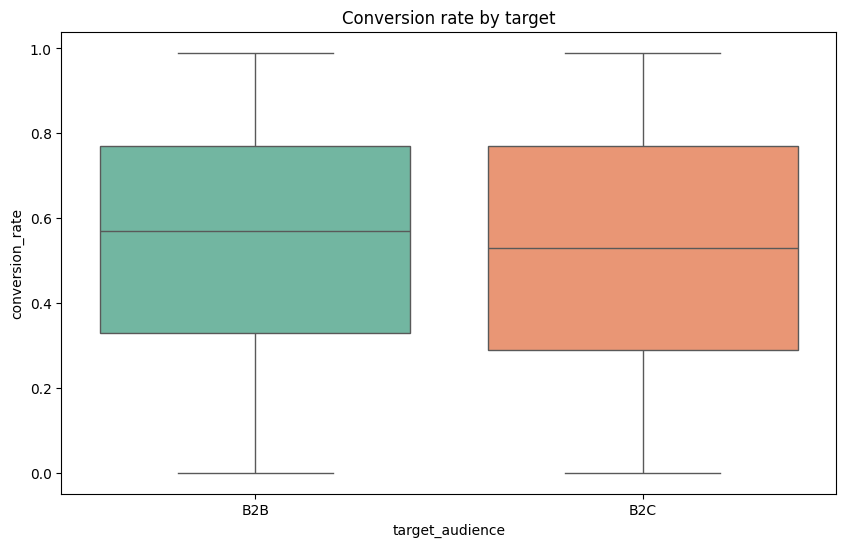

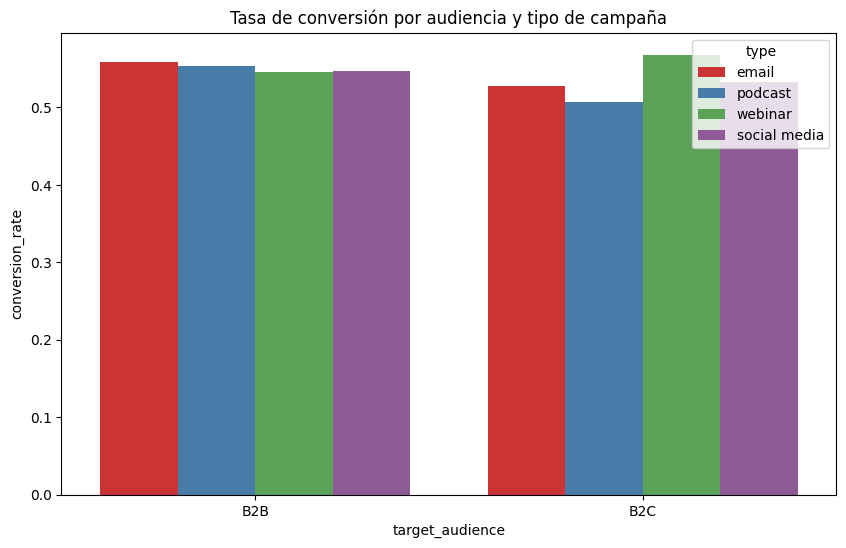

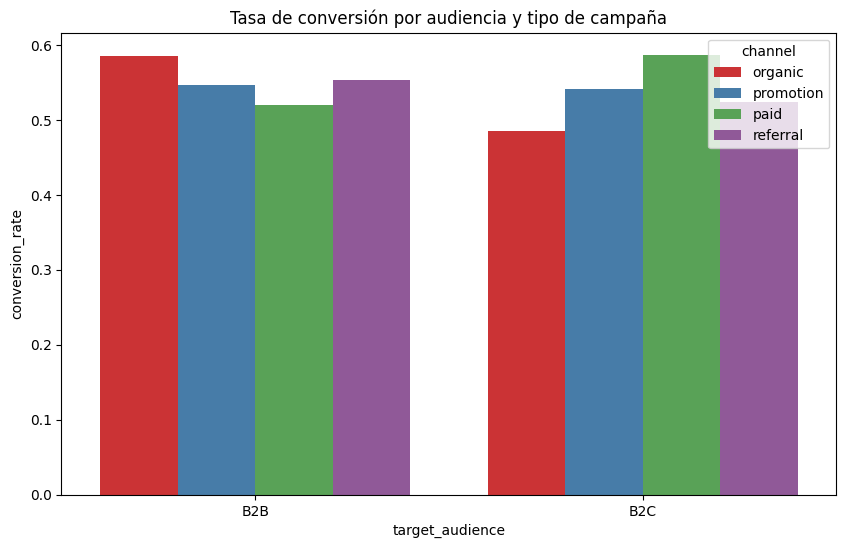

target_audience  channel  
B2C              paid         0.587025
B2B              organic      0.585520
                 referral     0.553465
                 promotion    0.546054
B2C              promotion    0.541111
                 referral     0.523984
B2B              paid         0.519138
B2C              organic      0.484914
Name: conversion_rate, dtype: float64


target_audience  type        
B2C              webinar         0.568222
B2B              email           0.558000
                 podcast         0.553148
                 social media    0.547440
                 webinar         0.545748
B2C              social media    0.532336
                 email           0.527097
                 podcast         0.507333
Name: conversion_rate, dtype: float64


In [32]:
# Let's compare the conversion rate for the target
plt.figure(figsize=(10, 6))

# We will create a boxplot for analyzing the conversion rate distribution by target
sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette='Set2')
plt.title('Conversion rate by target')
plt.show()

# And we wil use a bar graph to see the relationship between the conversion rate and the target based on other type and channel
plt.figure(figsize=(10, 6))
sns.barplot(x='target_audience', y='conversion_rate', hue='type', data=df, errorbar=None, palette='Set1')
plt.title('Tasa de conversión por audiencia y tipo de campaña')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='target_audience', y='conversion_rate', hue='channel', data=df, errorbar=None, palette='Set1')
plt.title('Tasa de conversión por audiencia y tipo de campaña')
plt.show()

# We will check as well the mean by channel
mean_target_by_channel = df.groupby(['target_audience', 'channel'])['conversion_rate'].mean().sort_values(ascending=False)

# And the mean by type
mean_target_by_type = df.groupby(['target_audience', 'type'])['conversion_rate'].mean().sort_values(ascending=False)

# Mostrar los resultados
print(mean_target_by_channel)
print('\n')
print(mean_target_by_type)



There are significant differences in the 'conversion_rate':

- If we look at the values based on the 'channel', we can observe a 10% difference in the 'B2C' target when the channel is 'paid' or 'organic', as well as a 7% difference in the 'B2B' target in the same channels, but in the opposite direction. This is quite striking.
- If we look at the values based on the 'type', we can observe a 6% difference in the 'B2C' target when the type is 'webinar' or 'podcast'. However, when the target is 'B2B', there are hardly any differences, with the largest being 1% between 'email' and 'webinar'.

Sí hay diferencias significativas en la "conversion_rate":
- Si observamos los valores en función al "channel", podemos observar una diferencia de un 10% en el target "B2C" cuando el channel es "paid" o "organic" así como una diferencia de un 7% en el target "B2B" en los mismos channels pero al revés. Lo cual es muy llamativo.
- Si observamos los valores en funcioón del "type", poemos observar una diferencia de un 6% en el target "B2C" cuando el type es "webinar" o "podcast", sin embargo cuando el target es "B2B" no hay apenas diferencias siendo la mayor de un 1% entre "email" y "webinar".

**¿Qué campaña tiene el mayor beneficio neto (net_profit)? ¿Qué características la hacen exitosa?**

Objetivo: Identifica las campañas más rentables y analiza qué factores contribuyen a su éxito.

Enfoque sugerido: Realiza un ranking de campañas según beneficio neto y analiza en profundidad las características de las más exitosas. Busca patrones comunes que puedan replicarse en futuras campañas.

Visualizaciones recomendadas: Tabla con las top 5-10 campañas por beneficio neto, gráficos comparativos con estas campañas destacadas

In [41]:
# Let's sort the campaign by net profit and see only the top 5
top_campaigns_by_profit = df.sort_values(by='net_profit', ascending=False)
top_campaigns_by_profit.head(10)

# Now let's check the different values to see if they have something in common
top10_campaigns_by_profit = top_campaigns_by_profit.head(10)
top10_campaigns_by_profit[['campaign_name', 'net_profit', 'budget', 'roi', 'type', 'target_audience', 'channel','duration_days', 'month_start', 'month_end', 'year_start']]



,campaign_name,net_profit,budget,roi,type,target_audience,channel,duration_days,month_start,month_end,year_start
491,Advanced systematic complexity,987859.73,1873.52,0.95,podcast,B2C,organic,306,6,4,2023
879,Balanced optimizing software,987359.82,10297.36,0.95,podcast,B2B,paid,396,4,5,2023
698,Object-based didactic intranet,979827.40,6430.70,0.64,social media,B2B,paid,332,7,6,2023
202,Reverse-engineered static infrastructure,974958.97,12246.32,0.48,email,B2B,referral,308,7,5,2023
192,Sharable upward-trending initiative,973355.11,20951.30,0.58,social media,B2C,organic,534,10,4,2022
169,Realigned radical hardware,965199.63,34512.86,0.20,webinar,B2B,referral,617,11,7,2022
900,Up-sized dedicated workforce,964497.81,26043.99,0.28,email,B2C,organic,616,9,5,2022
790,Function-based homogeneous productivity,963838.00,11711.34,0.26,social media,B2B,organic,554,10,5,2022
824,Right-sized transitional standardization,960202.70,9929.80,0.97,email,B2C,promotion,334,2,1,2023
905,Implemented logistical architecture,958135.52,15386.79,0.23,webinar,B2B,organic,261,7,4,2023


C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2368490587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='net_profit', y='campaign_name', data=top_campaigns_by_profit.head(10), palette='viridis')


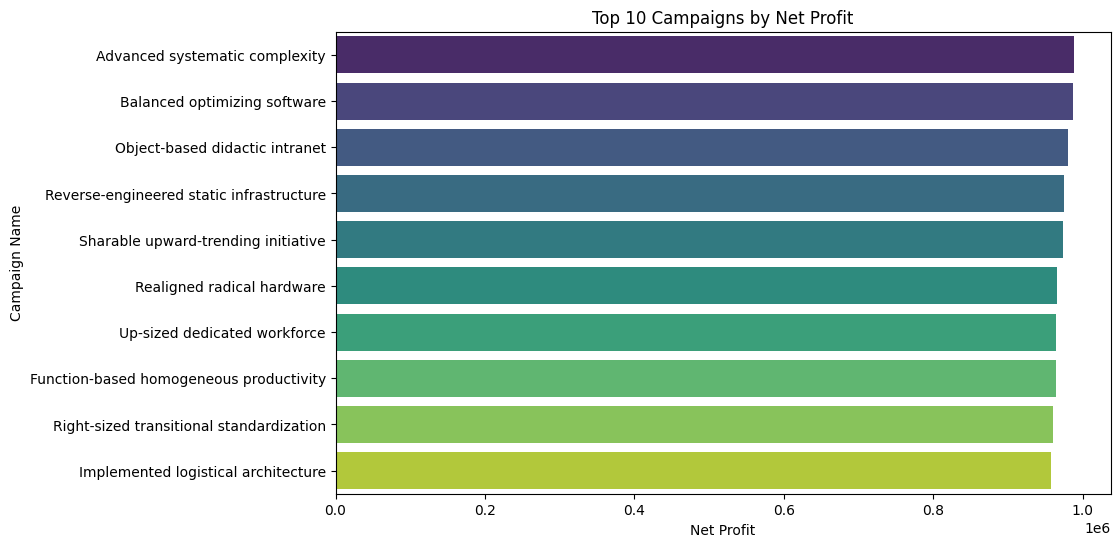

In [43]:
# Let's see those campaign in a graph
plt.figure(figsize=(10, 6))
sns.barplot(x='net_profit', y='campaign_name', data=top_campaigns_by_profit.head(10), palette='viridis')
plt.title('Top 10 Campaigns by Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Campaign Name')
plt.show()

C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2613960508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='budget', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[0,0])
C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2613960508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='duration_days', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[0,1])
C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2613960508.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.cou

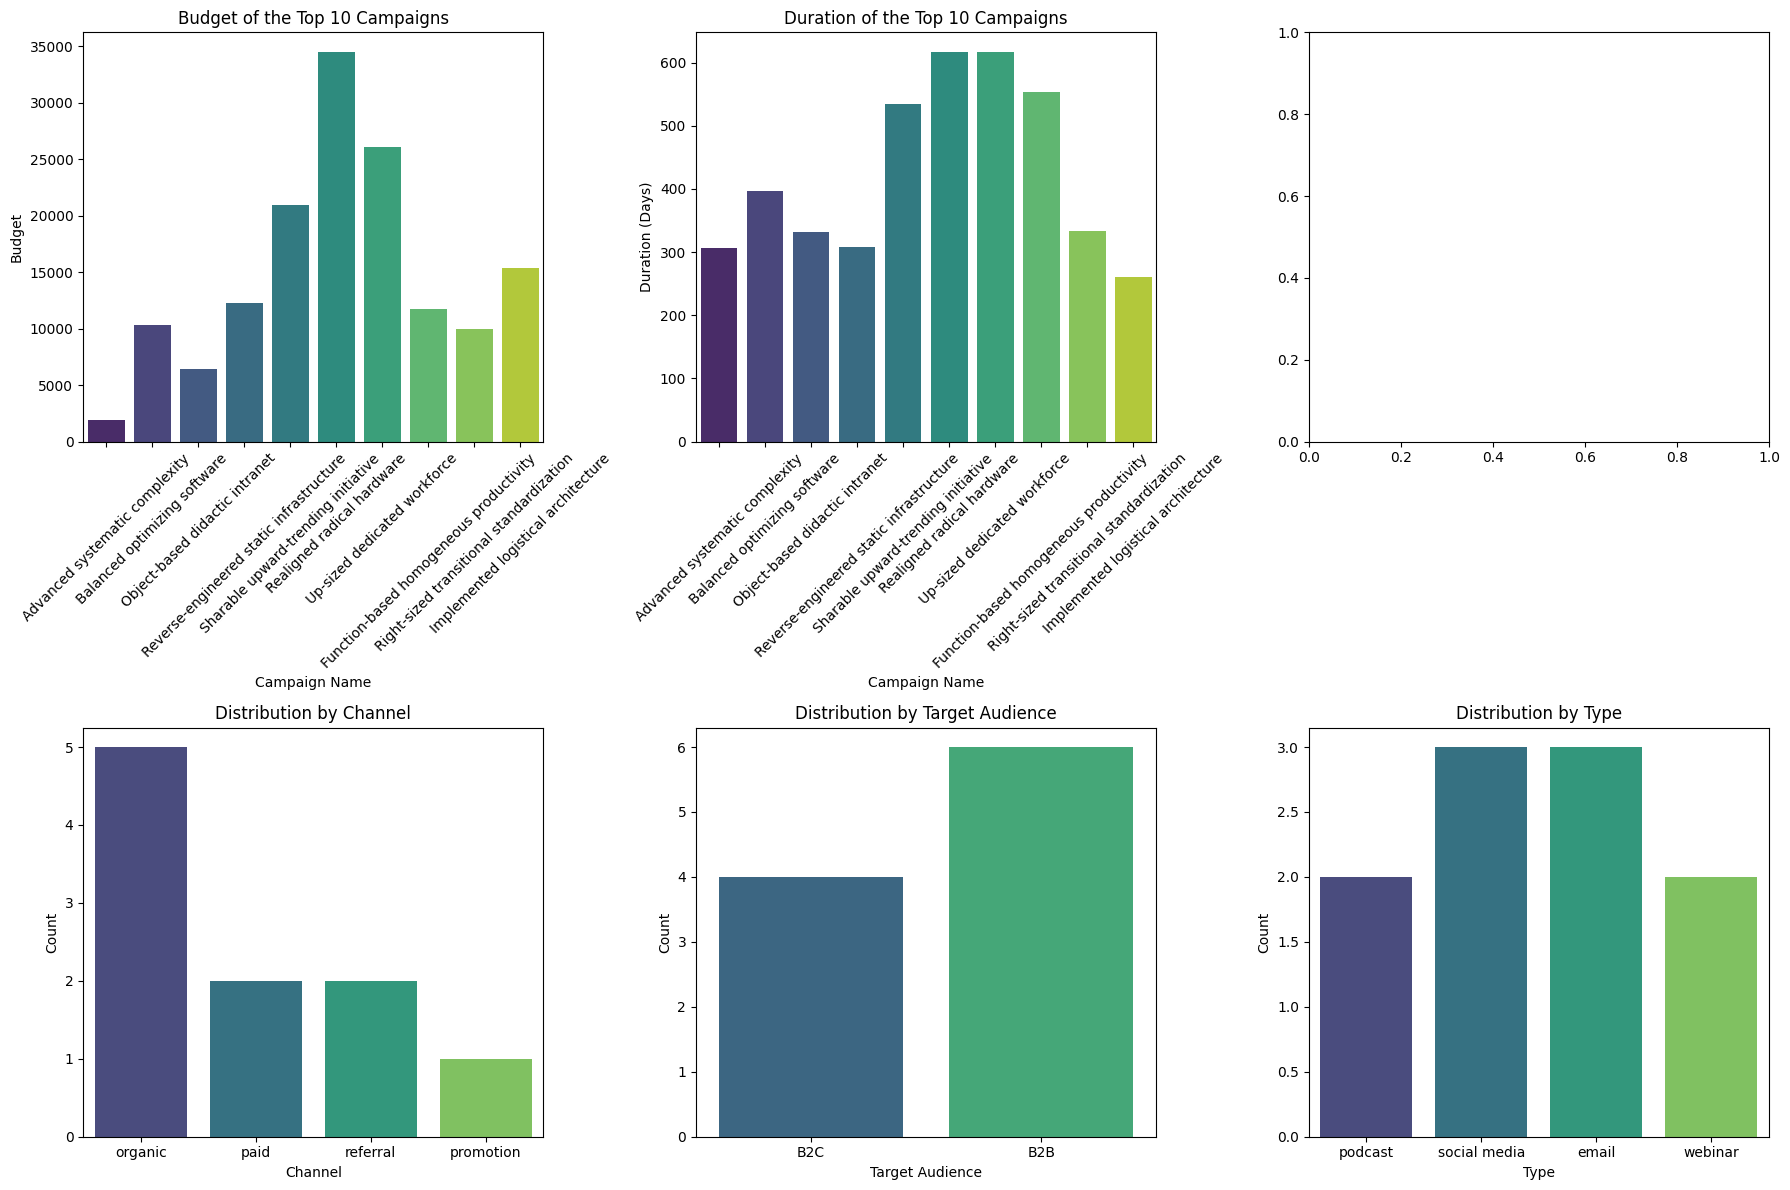

In [51]:
# And let's compare them with a graph based on the budget, type, target audience, channel and days of duration
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(x='campaign_name', y='budget', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[0,0])
axs[0,0].set_title('Budget of the Top 10 Campaigns')
axs[0,0].set_xlabel('Campaign Name')
axs[0,0].set_ylabel('Budget')
axs[0,0].tick_params(axis='x', rotation=45)

sns.barplot(x='campaign_name', y='duration_days', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[0,1])
axs[0,1].set_title('Duration of the Top 10 Campaigns')
axs[0,1].set_xlabel('Campaign Name')
axs[0,1].set_ylabel('Duration (Days)')
axs[0,1].tick_params(axis='x', rotation=45)

sns.countplot(x='channel', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[1,0])
axs[1,0].set_title('Distribution by Channel')
axs[1,0].set_xlabel('Channel')
axs[1,0].set_ylabel('Count')

sns.countplot(x='target_audience', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[1,1])
axs[1,1].set_title('Distribution by Target Audience')
axs[1,1].set_xlabel('Target Audience')
axs[1,1].set_ylabel('Count')

sns.countplot(x='type', data=top_campaigns_by_profit.head(10), palette='viridis', ax=axs[1,2])
axs[1,2].set_title('Distribution by Type')
axs[1,2].set_xlabel('Type')
axs[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

We cannot draw any conclusions from the budget or the number of days the campaign lasted, but we can see that the 'organic' channel is the one with the most successful campaigns. A similar pattern is observed (though with less difference) for the 'B2B' target audience and the 'social media' and 'email' types.

No podemos sacar ninguna conclusión respecto al "budget" o a la duración de la campaña pero sí podemos observar que el "channel" está bastante diferenciado, teniendo el valor "organic" más peso sobre los otros. En menos medida podemos sacar las mismas conclusiones respecto al "target_audience" con "B2B" y el "type" con "social media" y "email".

**¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?**

Objetivo: Analiza si un mayor presupuesto se traduce en mayores ingresos y si hay un punto óptimo de inversión.

Enfoque sugerido: Estudia la relación entre presupuesto e ingresos mediante análisis de correlación y regresión. Busca si la relación es lineal o si hay rendimientos decrecientes a partir de cierto punto.

Visualizaciones recomendadas: Gráfico de dispersión con línea de tendencia, posiblemente segmentado por canal o tipo de campaña

Correlation between budget and revenue: -0.019737216410826198


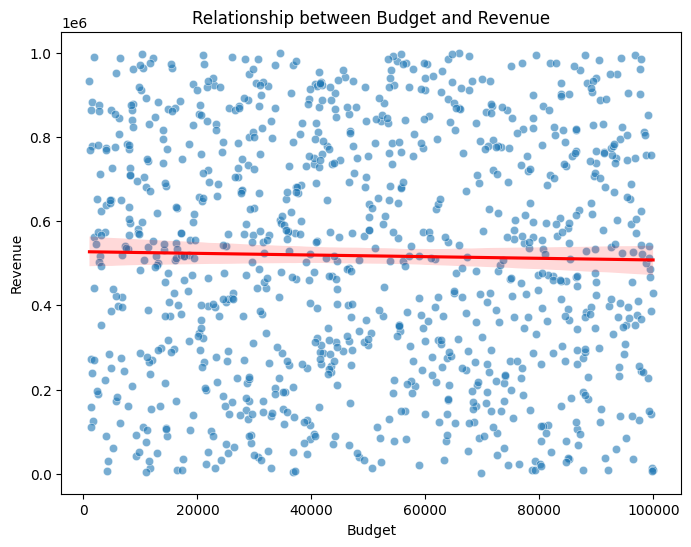

In [53]:
# Let's calculate the correlation between the budget and the revenue
correlation = df['budget'].corr(df['revenue'])
print(f"Correlation between budget and revenue: {correlation}")

# We will create a scatter chart with a trend line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
sns.regplot(x='budget', y='revenue', data=df, scatter=False, color='red')
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2093313892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='budget', data=top_10_campaigns, ax=axs[0], palette='Blues')
C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2093313892.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='budget', data=bottom_10_campaigns, ax=axs[1], palette='Reds')


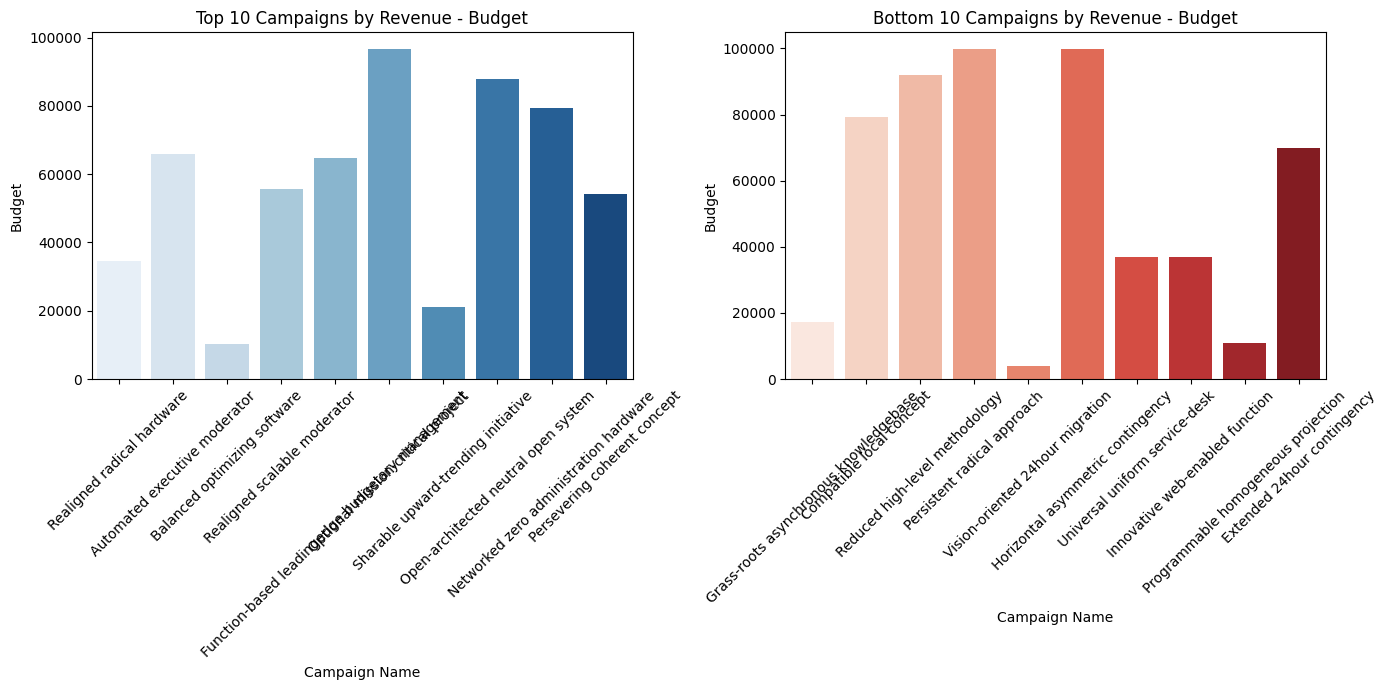

In [54]:
# Let's create two graphs to see the budget for the top and bottom 10 campaign by revenue
df_sorted = df.sort_values(by='revenue', ascending=False)

top_10_campaigns = df_sorted.head(10)
bottom_10_campaigns = df_sorted.tail(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(x='campaign_name', y='budget', data=top_10_campaigns, ax=axs[0], palette='Blues')
axs[0].set_title('Top 10 Campaigns by Revenue - Budget')
axs[0].set_xlabel('Campaign Name')
axs[0].set_ylabel('Budget')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x='campaign_name', y='budget', data=bottom_10_campaigns, ax=axs[1], palette='Reds')
axs[1].set_title('Bottom 10 Campaigns by Revenue - Budget')
axs[1].set_xlabel('Campaign Name')
axs[1].set_ylabel('Budget')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We can clearly see that the correlation between budget and revenue is virtually nonexistent. We have some top campaigns with small budgets and also some very poor campaigns with high budgets. If we look at the data, we can see the correlation is -0.02 which means is almost null.

Podemos observar en las tres gráficas y que no hay correlación alguna entre el "budget" y el "revenue", tenemos campañas exitosas con un "budget" muy pequeño y campañas malas con un "budget" muy alto. Si miramos también los datos, podemos ver que la correlación es de -0.02 lo cual implica que es prácticamente nula.

**¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?**

Objetivo: Identifica las campañas de alto rendimiento que cumplan ambos criterios para posible replicación.

Enfoque sugerido: Filtra las campañas según los criterios establecidos y analiza sus características comunes. Considera crear un sistema de clasificación más completo con múltiples criterios.

Visualizaciones recomendadas: Tabla filtrada o gráfico de cuadrantes que muestre las campañas de alto rendimiento

In [62]:
# Since we want to see the campaigns with the best performance we will add 2 more filters and then 
# we wil filter the campaigns which meet the criteria
high_performance_campaigns = df[(df['roi'] > 0.5) & (df['revenue'] > 500000) & (df['budget'] < 50000) & (df['conversion_rate'] > 0.7)]

print(f"There are {high_performance_campaigns.shape[0]} top performance campaigns.")

high_performance_campaigns.head(10)

There are 53 top performance campaigns.


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,...,year_end,month_end,quarter_end,roi_category,conversion_category,duration_days,high_budget_flag,high_roi_flag,high_conversion_rate_flag,high_revenue_flag
8,Intuitive responsive support,2022-11-25,2024-04-04,1816.22,0.81,social media,B2C,referral,0.85,563280.30,...,2024,4,2,High,High,496,0,1,1,0
11,Networked even-keeled toolset,2023-03-16,2023-09-05,49375.81,0.58,social media,B2B,organic,0.95,680416.90,...,2023,9,3,High,High,173,0,0,1,0
22,Future-proofed local forecast,2023-08-01,2023-08-11,46775.63,0.67,webinar,B2B,referral,0.75,814672.28,...,2023,8,3,High,High,10,0,0,0,1
42,Seamless bifurcated firmware,2022-09-06,2023-12-12,28323.41,0.84,webinar,B2B,organic,0.90,984261.30,...,2023,12,4,High,High,462,0,1,1,1
46,User-friendly analyzing moratorium,2023-04-06,2024-03-16,20328.53,0.99,email,B2B,organic,0.97,658107.70,...,2024,3,1,High,High,345,0,1,1,0
50,Diverse grid-enabled forecast,2022-11-18,2023-11-18,11271.19,0.96,social media,B2C,referral,0.81,538367.39,...,2023,11,4,High,High,365,0,1,1,0
54,Open-source 6thgeneration secured line,2023-03-07,2023-09-30,12480.75,0.90,podcast,B2B,promotion,0.82,847778.95,...,2023,9,3,High,High,207,0,1,1,1
93,Expanded tangible capacity,2023-06-26,2024-05-07,20647.17,0.87,email,B2B,organic,0.78,759838.76,...,2024,5,2,High,High,316,0,1,1,0
97,Public-key dynamic synergy,2023-03-03,2023-11-16,8209.80,0.91,webinar,B2B,paid,0.78,725706.76,...,2023,11,4,High,High,258,0,1,1,0
105,Persistent disintermediate artificial intellig...,2023-01-23,2023-08-21,10659.15,0.70,email,B2B,promotion,0.84,506589.58,...,2023,8,3,High,High,210,0,0,1,0


C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2475983644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=high_performance_campaigns, palette='viridis', ax=axs[0])
C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2475983644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=high_performance_campaigns, palette='viridis', ax=axs[1])
C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2475983644.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_audience', data=high_performance_campaigns

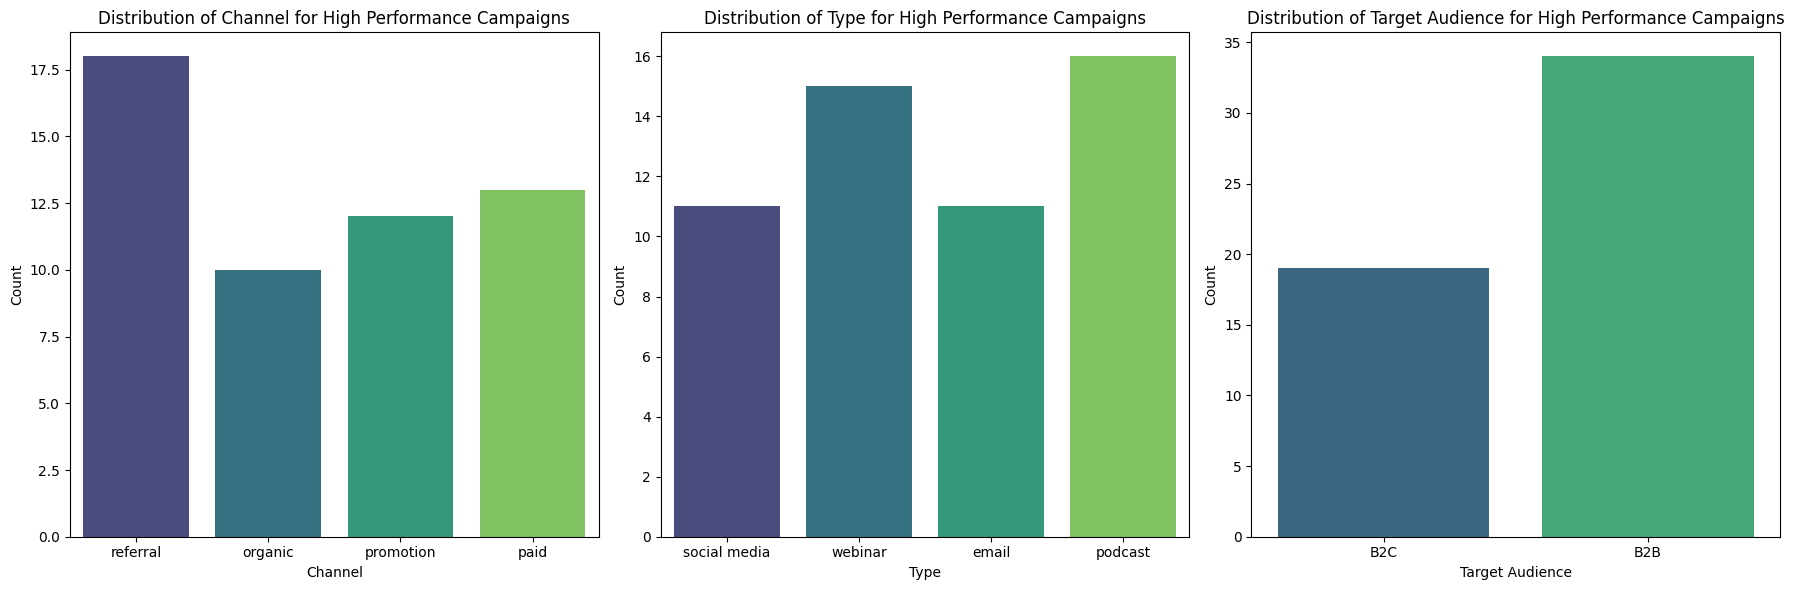

In [63]:
# Let's create some graphs so we can analyze the top campaign by channel, type and target
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='channel', data=high_performance_campaigns, palette='viridis', ax=axs[0])
axs[0].set_title('Distribution of Channel for High Performance Campaigns')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Count')

sns.countplot(x='type', data=high_performance_campaigns, palette='viridis', ax=axs[1])
axs[1].set_title('Distribution of Type for High Performance Campaigns')
axs[1].set_xlabel('Type')
axs[1].set_ylabel('Count')

sns.countplot(x='target_audience', data=high_performance_campaigns, palette='viridis', ax=axs[2])
axs[2].set_title('Distribution of Target Audience for High Performance Campaigns')
axs[2].set_xlabel('Target Audience')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

We can see 53 campaigns matched with our criteria of "Sucessful Campaigns": 
- Revenue over 500,000
- ROI over 0.5
- Conversion Rate over 0.7
- Budget less than 50,000

From the different graphs we can get some inputs such as the referral is the best "channel" and B2B is the best "target_audience".

Sólo 53 campañas cumplen con lo que consideramos "Campañas exitosas":
- 'revenue" mayor a 500,000
- 'roi' superior a 0.5
- 'conversion_rate' superior a 0.7
- 'budget' inferior a 50,000

De las gráficas obtenemos conclusiones como que 'referral' es el mejor 'channel' y que 'B2B' es el mejor 'target_audience'

**¿Existen patrones estacionales o temporales en el rendimiento de las campañas?**

Objetivo: Analiza si hay variaciones en el rendimiento según la época del año o tendencias a lo largo del tiempo.

Enfoque sugerido: Utiliza los componentes temporales extraídos de la fecha para agrupar y comparar el rendimiento a lo largo del tiempo. Busca patrones estacionales o tendencias generales.

Visualizaciones recomendadas: Gráficos de línea temporal, heatmaps por mes y tipo de campaña, análisis de rendimiento por trimestre